In [ ]:
Pre-processing steps

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torchvision.transforms.functional as TF
import torchvision.transforms as T
from torchvision.io import ImageReadMode
from torchvision.io import read_image
from torch import nn
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

import torch
import random

In [2]:
# code om images te verplaatsen en te hernoemen

In [ ]:
import os
import shutil
 
# Function to copy multiple files with new name
 
original_path_train = '/home/elmer/dev_debian/working/python3/MakeAIWork3/project_3/apple_disease_classification/original/Train'
original_path_test = '/home/elmer/dev_debian/working/python3/MakeAIWork3/project_3/apple_disease_classification/original/Test'
new_path_train = '/home/elmer/dev_debian/working/python3/MakeAIWork3/project_3/apple_disease_classification/yolov3/train'
new_path_test = '/home/elmer/dev_debian/working/python3/MakeAIWork3/project_3/apple_disease_classification/yolov3/test'
 
# put paths in lists to loop over
orig_paths = [original_path_train, original_path_test]
new_paths = [new_path_train, new_path_test]
 
# copy files
for i, orig_path in enumerate(orig_paths):
    for dir in os.listdir(orig_path):
        for j, filename in enumerate(os.listdir(os.path.join(orig_path,dir))):
            new_file_name = dir + '_' + str(j) + ".jpg"
            src = os.path.join(orig_path, dir, filename)
            dst = os.path.join(new_paths[i], new_file_name)
            # print(src)
            # print(dst)
            # copy files
            shutil.copyfile(src, dst)

In [14]:
# import image

anApple = '../data/Test/Normal_Apple/9.jpg'

anApplePNG = '../data/proefcropper/fixed1.png'

In [15]:
# make Tensor
anAppleTensor = torchvision.io.read_image(f'{anApple}', ImageReadMode.UNCHANGED).float() / 255
anAppleTensor2 = torchvision.io.read_image(f'{anApple}', ImageReadMode.UNCHANGED).to(torch.float32) / 255

anApplePNGTensor = torchvision.io.read_image(f'{anApplePNG}', ImageReadMode.UNCHANGED).float() / 255

print(type(anAppleTensor))
print(anAppleTensor.shape)

print(type(anAppleTensor2))
print(anAppleTensor2.shape)


<class 'torch.Tensor'>
torch.Size([3, 179, 158])
<class 'torch.Tensor'>
torch.Size([3, 179, 158])


In [7]:
# anAppleTensorX = torch.Tensor(anAppleTensor)
# anAppleTensorX.transforms.ToTensor()


transform = transforms.ToTensor()

# Convert the image to Torch tensor
picTensor1 = transform(anAppleTensor)

NameError: name 'transforms' is not defined

In [15]:
anAppleTensor2

tensor([[[0.9059, 0.9059, 0.9059,  ..., 0.9294, 0.9294, 0.9294],
         [0.9059, 0.9059, 0.9059,  ..., 0.9294, 0.9294, 0.9294],
         [0.9059, 0.9059, 0.9059,  ..., 0.9294, 0.9294, 0.9294],
         ...,
         [0.9490, 0.9490, 0.9490,  ..., 0.9686, 0.9608, 0.9608],
         [0.9490, 0.9490, 0.9490,  ..., 0.9725, 0.9647, 0.9647],
         [0.9529, 0.9529, 0.9529,  ..., 0.9725, 0.9647, 0.9647]],

        [[0.9255, 0.9255, 0.9255,  ..., 0.9294, 0.9294, 0.9294],
         [0.9255, 0.9255, 0.9255,  ..., 0.9294, 0.9294, 0.9294],
         [0.9255, 0.9255, 0.9255,  ..., 0.9294, 0.9294, 0.9294],
         ...,
         [0.9412, 0.9412, 0.9412,  ..., 0.9490, 0.9490, 0.9490],
         [0.9412, 0.9412, 0.9412,  ..., 0.9529, 0.9529, 0.9529],
         [0.9451, 0.9451, 0.9451,  ..., 0.9529, 0.9529, 0.9529]],

        [[0.9490, 0.9490, 0.9490,  ..., 0.9608, 0.9608, 0.9608],
         [0.9490, 0.9490, 0.9490,  ..., 0.9608, 0.9608, 0.9608],
         [0.9490, 0.9490, 0.9490,  ..., 0.9608, 0.9608, 0.

In [10]:
# resize Tensor
anAppleTensorRe = TF.resize(anAppleTensor, (64, 64))

anApplePNGTensorRe = TF.resize(anApplePNGTensor, (64, 64))

print(anAppleTensorRe.shape)

torch.Size([3, 64, 64])


/home/pans/miniconda3/envs/miw/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


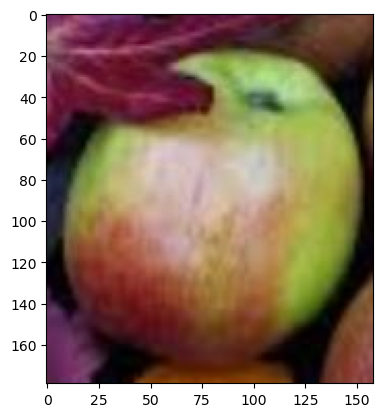

In [16]:
plt.imshow( anAppleTensor.permute(1, 2, 0)  );

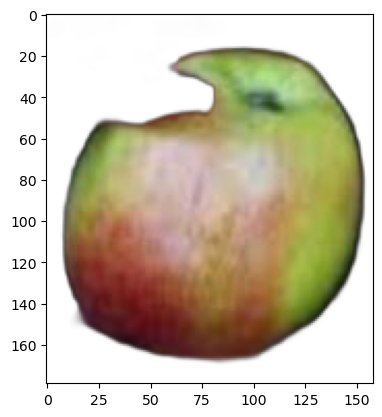

In [9]:

plt.imshow( anApplePNGTensor.permute(1, 2, 0)  );



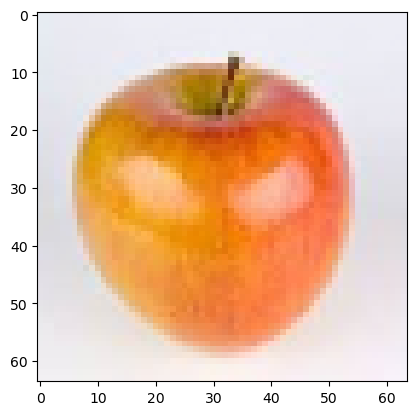

In [18]:
plt.imshow( anAppleTensorRe.permute(1, 2, 0)  );

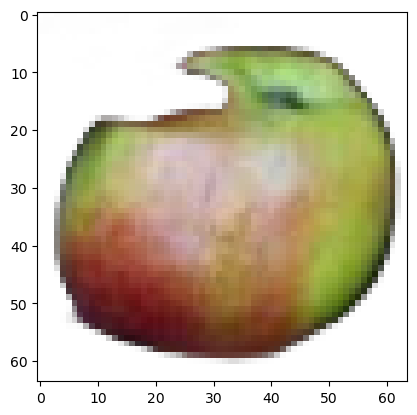

In [11]:
plt.imshow( anApplePNGTensorRe.permute(1, 2, 0)  );

In [ ]:
# import image

<class 'numpy.ndarray'>
(142, 154, 3)


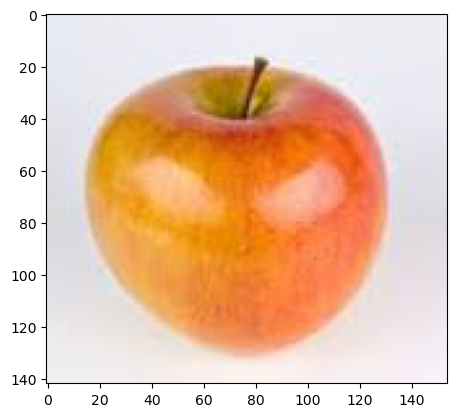

In [4]:
# make numpy array
anAppleArray2 = plt.imread('../data/Train/Normal_Apple/1.jpg').astype(float) / 255
print(type(anAppleArray2))
print(anAppleArray2.shape)

plt.imshow(anAppleArray2)

In [12]:
# transform to Tensor
anAppleTensor2 = torch.Tensor(anAppleArray2)

print(type(anAppleTensor2))
print(anAppleTensor2.shape)
# plt.imshow( anAppleTensor2.permute(1, 2, 0)  );
print(anAppleTensor2.permute(2, 0, 1).shape)

anAppleTensor3 = anAppleTensor2.permute(2, 0, 1)

<class 'torch.Tensor'>
torch.Size([142, 154, 3])
torch.Size([3, 142, 154])


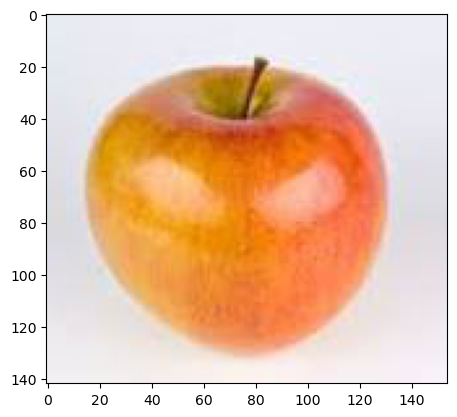

In [14]:
plt.imshow(anAppleTensor3.permute(1, 2, 0) )

In [21]:
anAppleTensorReshape = TF.resize(anAppleTensor3, (64,64))

print(type(anAppleTensorReshape))
print(anAppleTensorReshape.shape)

<class 'torch.Tensor'>
torch.Size([3, 64, 64])


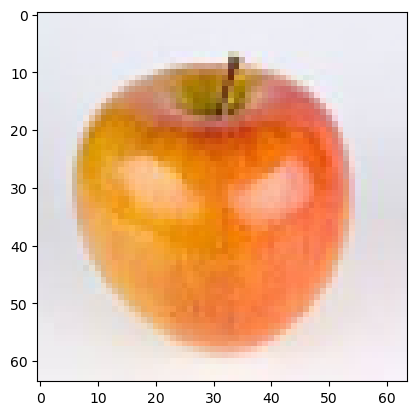

In [22]:
plt.imshow( anAppleTensorReshape.permute(1, 2, 0)  );



In [12]:
# tweedee manier om van numpy naar Tensor te gaan
anAppleTensor4 = torch.from_numpy(anAppleArray2)

print(anAppleTensor4.shape)
print(anAppleTensor4.permute(2,0,1).shape)
# het resultaat is hetzelfde als bij torch.Tensor()

torch.Size([142, 154, 3])
torch.Size([3, 142, 154])


In [25]:
#  derde manier om van numpy naar Tensor te gaan

import torch
import cv2
import torchvision.transforms as transforms
from torchvision.io import read_image, ImageReadMode

picPath = '../data/Train/Normal_Apple/1.jpg'

# Read the image
pic = cv2.imread(picPath)
  
# Convert BGR image to RGB image
pic = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
  
# Define a transform to convert
# the image to torch tensor
# transform = transforms.Compose([
#     transforms.ToTensor()
# ])

transform = transforms.ToTensor()

  
# Convert the image to Torch tensor
picTensor1 = transform(pic)
  
print(picTensor1.shape)

torch.Size([3, 142, 154])
